In [ ]:
#Import required libraries
import numpy as np
import torch
import matplotlib.pyplot as plt

#### If our vocabulary has 20 words only, the Neural network will output 20 individual values. Each of these values will individually mean how much energy the neural network calculated for each of the words given the input word(s). However, this is not normalized and is not collectively communicating a probability distribution. Let's plot these values.

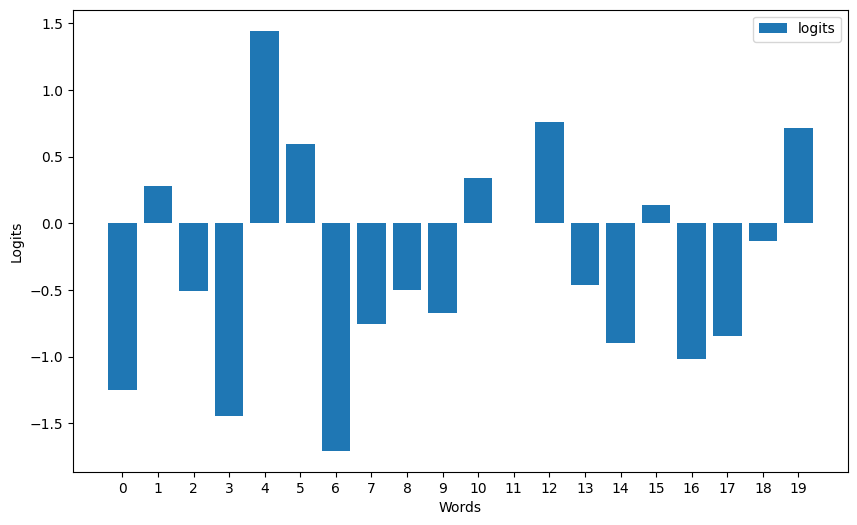

In [23]:
logits = torch.randn(20)
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(range(len(logits)), logits.numpy(), label='logits')
axs.set_xlabel('Words')
axs.set_xticks(range(len(logits)))
axs.set_ylabel('Logits')
axs.legend()
plt.show()

#### With this, we could choose the 9th word as the best choice. However, there's contribution to other words that should not be neglected. In order to formalize this as a probability distribution, we apply softmax. Let's plot those values as well.
## $$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$

#### Here $K$ is 20, the length of our vocabulary

In [26]:
probs = torch.softmax(logits, dim=-1)
sum(probs)

tensor(1.)

$$probabilities = [0.0368, 0.0848, 0.0098, 0.0225, 0.0457, 0.0212, 0.0275, 0.0094, 0.1813,0.0592, 0.0217, 0.0580, 0.0243, 0.0768, 0.0220, 0.0304, 0.1205, 0.0586,0.0152, 0.0743]$$

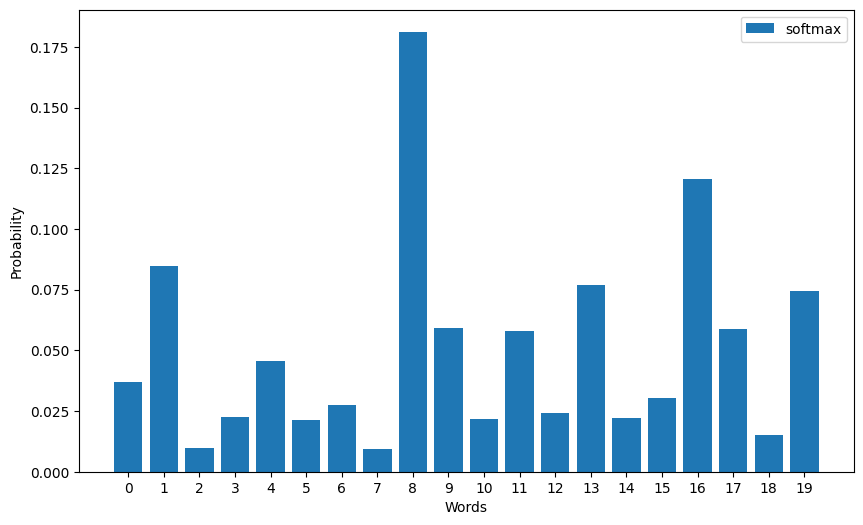

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(range(len(probs)), probs.numpy(), label='softmax')
axs.set_xlabel('Words')
axs.set_ylabel('Probability')
axs.set_xticks(range(len(logits)))
axs.legend()
plt.show()

#### While this may be good enough for classification tasks for us to choose the right class of a given input, it will not suffice for generative tasks that requires to choosing something new. So, we treat the outputs from the softmax as a probability distribution and sample from the distribution. While this will make it probabilistic, it will still be favoring the most probable word. In order to make generation a bit more "creative", temperature scaling of softmax was suggested. The temperature can vary from 0 to any positive value. However, we can add an epsilon (a very small value) in order to not prevent undefined division

## $$\sigma(z_i) = \frac{e^{z_{i}/T}}{\sum_{j=1}^K e^{z_{j}/T}} \ \ \ for\ i=1,2,\dots,K$$

#### Let's plot the values for some T.

#### We can see that values of $0 \leq T < 1$ will look quite maximize the difference between the probability of each of the words and as the value increases. At $T = 1$ the softmax behaves as usual softmax and at $T > 1$ the probability distribution flats out and at very high values, each of the words become equiprobable to be sampled from the distribution.

In [27]:
temp = 0
epsilon = 1e-10
probs_temp = torch.softmax(logits / temp, dim=-1)

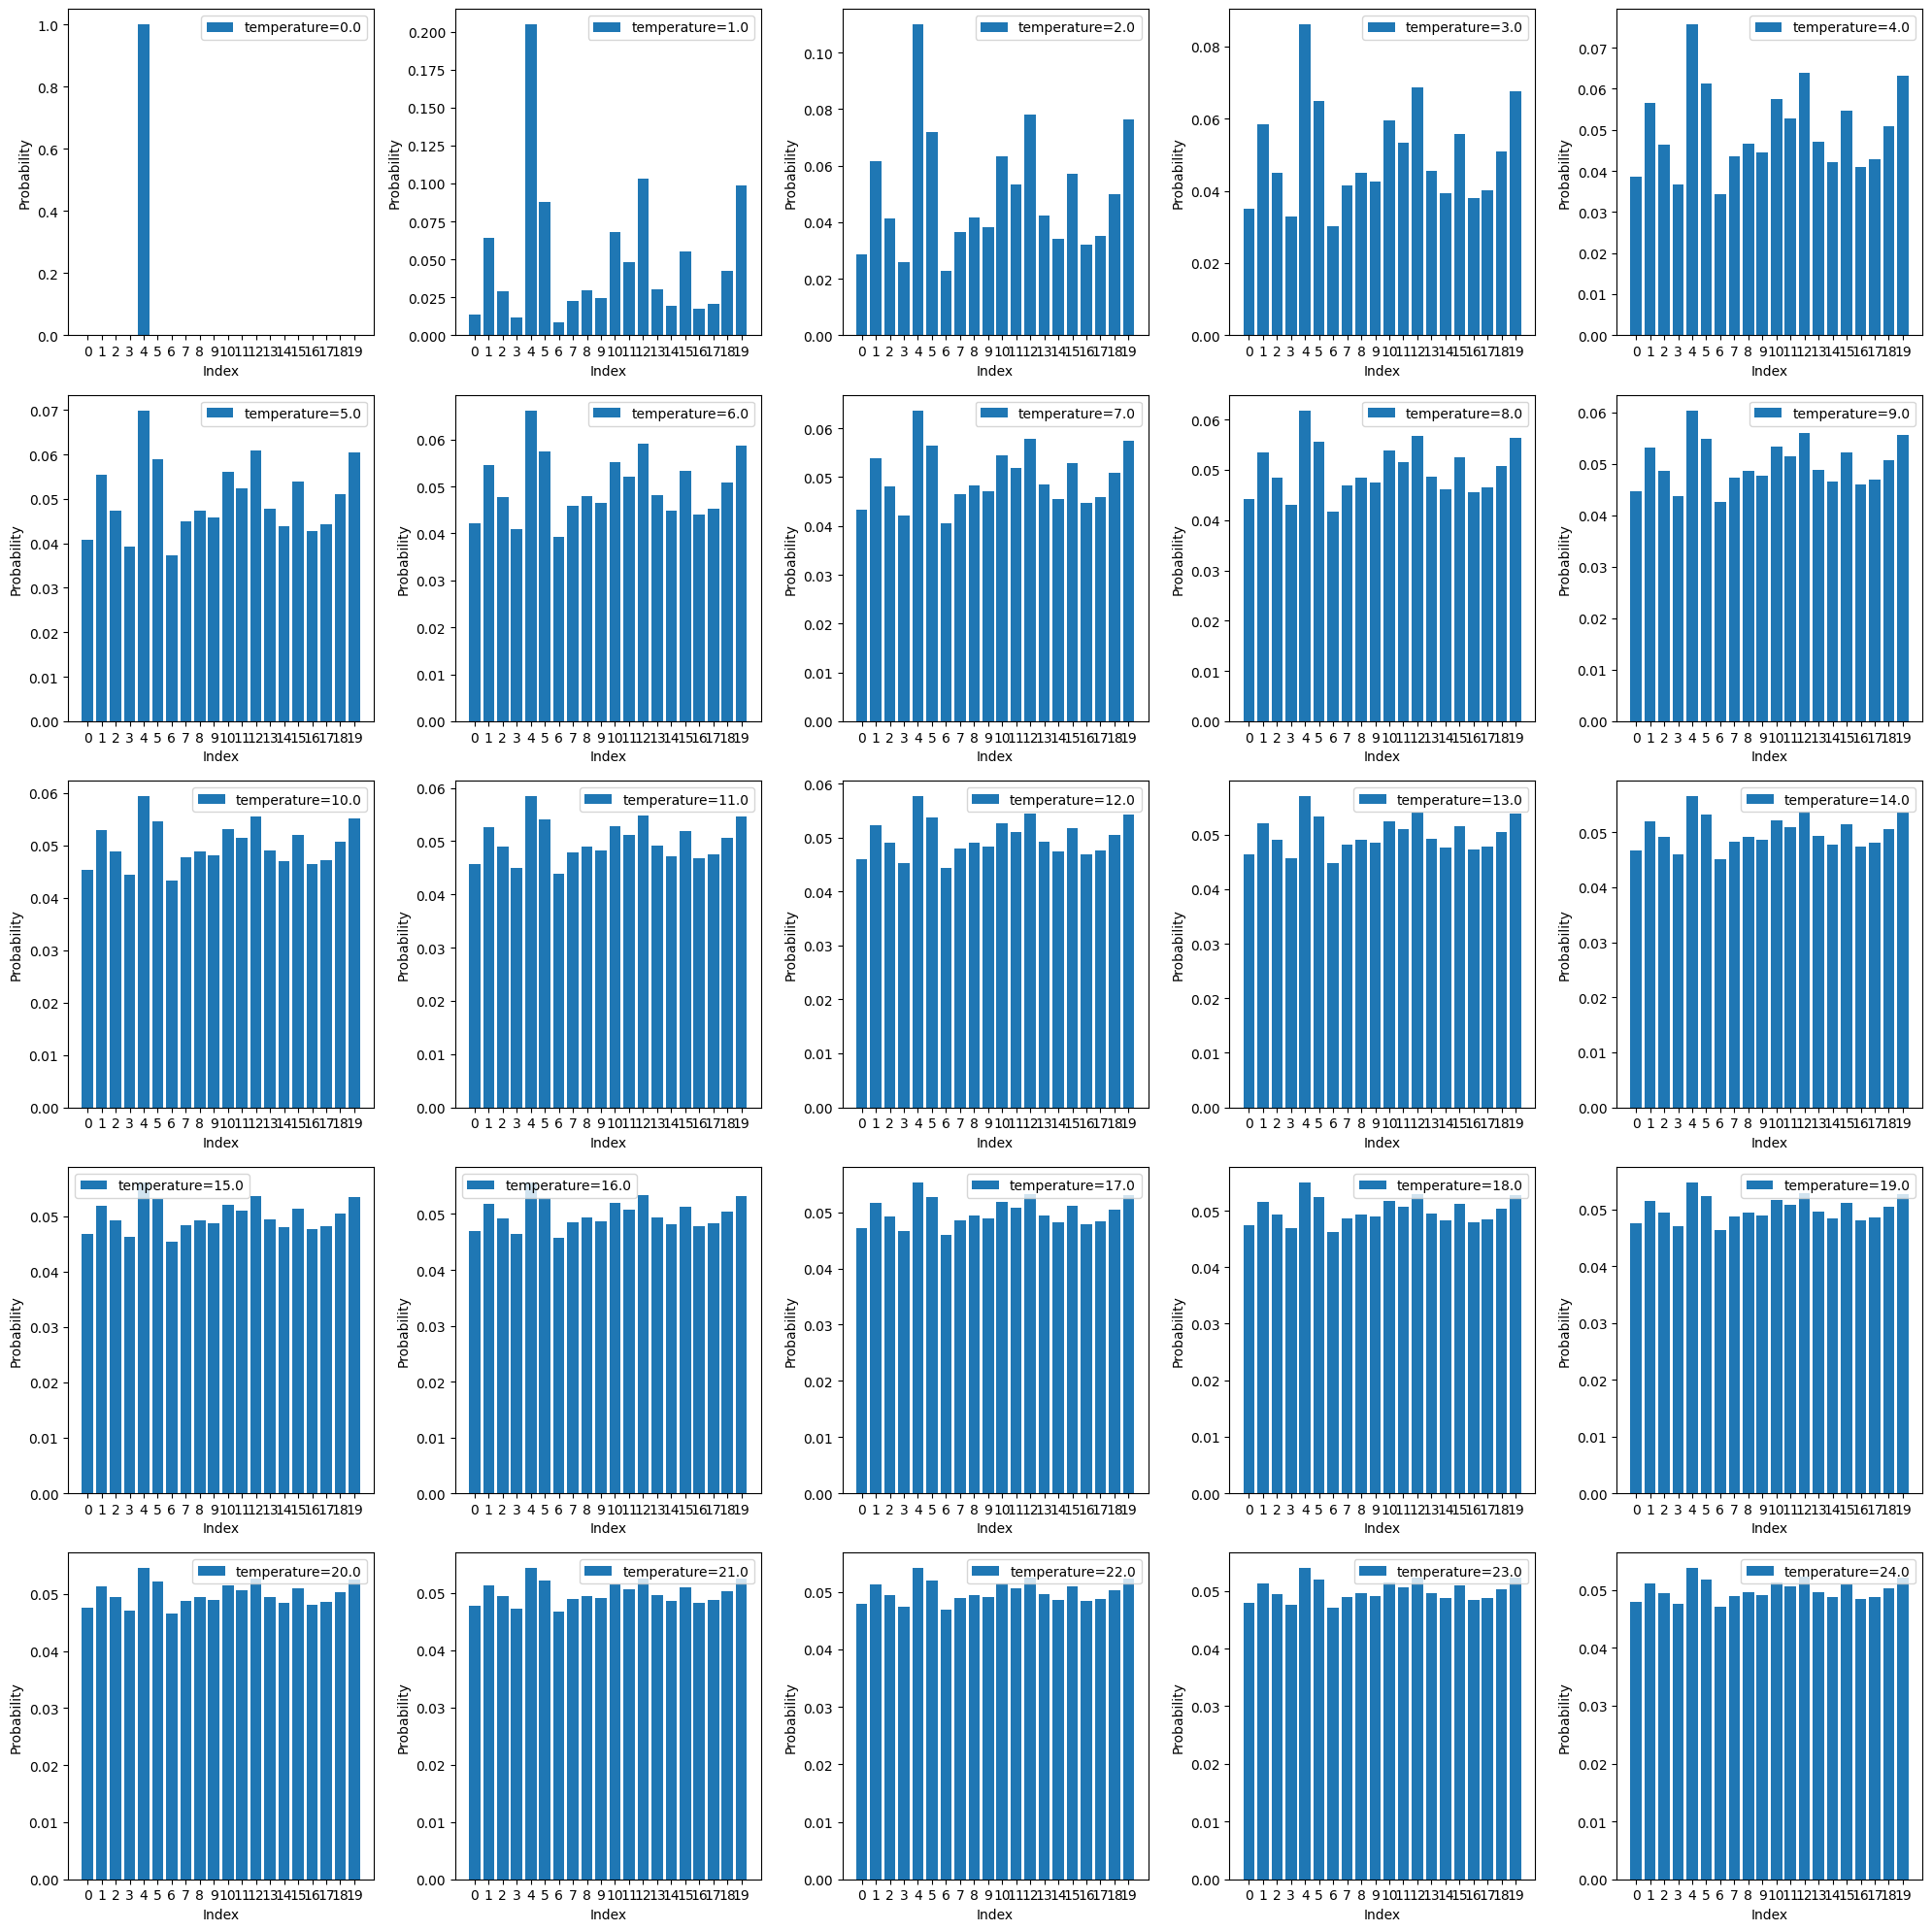

In [54]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i, temp in enumerate(np.linspace(0, 24, 25)):
    probs_temp = torch.softmax(logits / (temp + epsilon), dim=-1)
    ax = axs[i // 5, i % 5]
    ax.bar(range(len(probs_temp)), probs_temp.numpy(), label=f'temperature={temp}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Probability')
    ax.set_xticks(range(len(logits)))
    ax.legend()
plt.tight_layout()
plt.show()